# Problem Set 6, Part One: Due Thursday, March 6 by 8am Eastern Standard Time

## Name: David Millard

**Show your work on all problems!** Be sure to give credit to any
collaborators, or outside sources used in solving the problems. Note
that if using an outside source to do a calculation, you should use it
as a reference for the method, and actually carry out the calculation
yourself; it’s not sufficient to quote the results of a calculation
contained in an outside source.

Fill in your solutions in the notebook below, inserting markdown and/or code cells as needed.  Try to do reasonably well with the typesetting, but don't feel compelled to replicate my formatting exactly.  **You do NOT need to make random variables blue!**

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['font.size'] = 14

### Conover Problems on The Squared-Ranks Test

#### Exercise 5.3.2:

A particular watershed has been built up extensively in recent years,
with housing developments, dams, and so forth. A random sample of stream
flow rates (cubic feet per minute) for a stream in that watershed is
compared with a sample of rates from earlier times to see if the
variability has changed.

<table>
<tr><th>Present Rates</th><th>Past Rates</th></tr>
<tr><td>32</td><td>39</td></tr>
<tr><td>36</td><td>21</td></tr>
<tr><td>41</td><td>58</td></tr>
<tr><td>27</td><td>46</td></tr>
<tr><td>35</td><td>30</td></tr>
<tr><td>48</td><td>22</td></tr>
<tr><td>31</td><td>17</td></tr>
<tr><td>28</td><td>19</td></tr>
</table>

Is there a significant difference in variances? \[Calculate a $p$-value.\]

$H_0$: There is no difference in variances.

$H_1$: There is a difference in variances.

$T = 2.2082$

$p$-value = $0.0272$

Since $0.0272 < 0.05$ we have sufficient evidence to reject the null hypothesis.

In [3]:
x_i = np.array([32, 36, 41, 27, 35, 48, 31, 28]); y_j = np.array([39, 21, 58, 46, 30, 22, 17, 19])
n = len(x_i); m = len(y_j); N = n+m; xbar = np.mean(x_i); ybar = np.mean(y_j);
U_i = np.abs(x_i - xbar); V_j = np.abs(y_j - ybar); U_i, V_j

(array([ 2.75,  1.25,  6.25,  7.75,  0.25, 13.25,  3.75,  6.75]),
 array([ 7.5, 10.5, 26.5, 14.5,  1.5,  9.5, 14.5, 12.5]))

In [4]:
UV_r = np.concatenate((U_i,V_j)); R_r = stats.rankdata(UV_r);
RU_i = R_r[:n]; RV_j = R_r[n:]; RU_i, RV_j

(array([ 4.,  2.,  6.,  9.,  1., 13.,  5.,  7.]),
 array([ 8. , 11. , 16. , 14.5,  3. , 10. , 14.5, 12. ]))

In [5]:
Rsq_r = R_r**2; Rsq_r

array([ 16.  ,   4.  ,  36.  ,  81.  ,   1.  , 169.  ,  25.  ,  49.  ,
        64.  , 121.  , 256.  , 210.25,   9.  , 100.  , 210.25, 144.  ])

In [6]:
Rsqbar = np.mean(Rsq_r); Rsqbar, (N+1)*(2*N+1)/6.

(93.46875, 93.5)

In [7]:
TU = np.sum(RU_i**2); TV = np.sum(RV_j**2); TU, TV

(381.0, 1114.5)

In [8]:
varT = n*m/(N-1) * np.mean((Rsq_r-Rsqbar)**2)

In [9]:
T1 = (TU-n*Rsqbar)/np.sqrt(varT); T1

-2.2082732775052087

In [10]:
2*stats.norm.cdf(T1)

0.027225228961902093

#### Exercise 5.3.4:

An investment class was divided into three groups of students. One group
was instructed to invest in bonds, the second in blue chip stocks, and
the third in speculative issues. Each student “invested” (on paper only)
\$10,000 and evaluated the hypothetical profit or loss at the end of 3
months with the following results.

<table>
<tr><th>Bonds</th><th>Blue Chip</th><th>Speculative</th></tr>
<tr><td>146</td><td>176</td><td>-540</td></tr>
<tr><td>180</td><td>110</td><td>1052</td></tr>
<tr><td>192</td><td>212</td><td> 642</td></tr>
<tr><td>185</td><td>108</td><td>-281</td></tr>
<tr><td>153</td><td>196</td><td> 67</td></tr>
</table>

Is the difference in variance significant? If so, which groups are
significantly different?

$H_0$: There is no difference in variances.

$H_1$: There is a difference in variances.

$T = 11.7098$

$p$-value = $0.0028$

Since $00.0028 < 0.05$ we have sufficient evidence to reject the null hypothesis.

In [11]:
x_i_j = [
    np.array([146, 180, 192, 185, 153]),
    np.array([176, 110, 212, 108, 196]),
    np.array([-540, 1052, 642, -281, 67])
]
n_i = np.array([len(xi_j) for xi_j in x_i_j]); k = len(n_i); N = np.sum(n_i); n_i,k,N

(array([5, 5, 5]), 3, 15)

In [12]:
xbar_i = np.array([np.mean(xi_j) for xi_j in x_i_j]); xbar_i

array([171.2, 160.4, 188. ])

In [13]:
U_i_j = [np.abs(xi_j-np.mean(xi_j)) for xi_j in x_i_j]; U_i_j

[array([25.2,  8.8, 20.8, 13.8, 18.2]),
 array([15.6, 50.4, 51.6, 52.4, 35.6]),
 array([728., 864., 454., 469., 121.])]

In [14]:
U_r = np.concatenate(U_i_j); RU_r = stats.rankdata(U_r)
i_r = np.concatenate([(i,)*n_i[i] for i in range(k)])
RU_i_j = [RU_r[i_r==i] for i in range(k)]; RU_i_j

[array([6., 1., 5., 2., 4.]),
 array([ 3.,  8.,  9., 10.,  7.]),
 array([14., 15., 12., 13., 11.])]

In [15]:
S_i = np.array([np.sum(RUi_j**2) for RUi_j in RU_i_j]); S_i

array([ 82., 303., 855.])

In [16]:
Sbar = np.mean(RU_r**2); Sbar

82.66666666666667

In [17]:
Dsq=N/(N-1)*np.mean((RU_r**2-Sbar)**2); Dsq, N/(N-1)*(np.mean(RU_r**4)-Sbar**2),(np.sum(RU_r**4)-N*Sbar**2)/(N-1) 

(5414.666666666665, 5414.666666666666, 5414.666666666666)

In [18]:
T = np.sum((S_i-n_i*Sbar)**2/n_i)/Dsq; T

11.709849790691951

In [19]:
stats.chi2(df=k-1).sf(T)

0.0028657508242562442

#### Problem 5.3.1:

Find the exact distribution of $T$ as given by Equation 3
\[$T=\sum_{i=1}^n [R(U_i)]^2$\] for $n=3$ and $m=4$ and compare it with
the quantiles from Table A9.

In [20]:
import itertools
from scipy.special import comb as nchoosek

In [21]:
n = 3; m = 4; N = n + m

RU_Ii = np.array([thisRU_i for thisRU_i in itertools.combinations(range(1,N+1),n)])

print(N, RU_Ii.shape)

TU_I = np.sort(np.sum(RU_Ii**2,axis=-1)); TU_I

7 (35, 3)


array([ 14,  21,  26,  29,  30,  35,  38,  41,  42,  45,  46,  49,  50,
        53,  54,  56,  59,  61,  62,  62,  65,  66,  69,  70,  74,  75,
        77,  78,  83,  86,  89,  90,  94, 101, 110])

In [22]:
alpha = 0.1

def calculate_critical_values(T_values, alpha):
    sorted_T = np.sort(T_values)
    
    one_tailed_critical = sorted_T[int((1 - alpha) * len(T_values))]
    
    lower_tailed_critical = sorted_T[int((alpha / 2) * len(T_values))]
    upper_tailed_critical = sorted_T[int((1 - alpha / 2) * len(T_values))]
    
    return one_tailed_critical, lower_tailed_critical, upper_tailed_critical

calculate_critical_values(TU_I, alpha)

(90, 21, 101)

### Conover Problems on Rank Correlations

#### Exercise 5.4.2:

The following is an example of a situation in which $\tau$ and $\rho$
yield widely varying estimates of correlation.

<table>
<tr><th>$\boldsymbol{X_i}$</th><th>$\boldsymbol{Y_i}$</th><th>$\boldsymbol{X_i}$</th><th>$\boldsymbol{Y_i}$</th><th>$\boldsymbol{X_i}$</th><th>$\boldsymbol{Y_i}$</th></tr>
<tr><td>-8.7</td><td>-0.6</td><td>-1.9</td><td>-4.7</td><td>2.2</td><td> 3.8</td></tr>
<tr><td>-8.3</td><td>-0.8</td><td>-1.6</td><td>-5.5</td><td>4.0</td><td> 3.5</td></tr>
<tr><td>-8.2</td><td>-1.3</td><td>-1.3</td><td>-5.6</td><td>5.6</td><td> 3.1</td></tr>
<tr><td>-7.2</td><td>-1.9</td><td>-0.2</td><td>-6.0</td><td>5.9</td><td> 2.6</td></tr>
<tr><td>-6.1</td><td>-2.0</td><td>0.7</td><td> 4.6</td><td> 6.2</td><td> 2.0</td></tr>
<tr><td>-6.0</td><td>-2.1</td><td>1.3</td><td> 4.4</td><td> 6.6</td><td> 1.2</td></tr>
<tr><td>-4.1</td><td>-4.0</td><td>1.6</td><td> 4.2</td><td> 6.7</td><td> 0.6</td></tr>
<tr><td>-2.0</td><td>-4.6</td><td>2.1</td><td> 3.9</td><td> 8.1</td><td> 0.4</td></tr>
</table>

\[For convenience, here are the data in numpy array form:\]

In [23]:
x_i = np.array([-8.7,-8.3,-8.2,-7.2,-6.1,-6.0,-4.1,-2.0,
                -1.9,-1.6,-1.3,-0.2, 0.7, 1.3, 1.6, 2.1,
                2.2, 4.0, 5.6, 5.9, 6.2, 6.6, 6.7, 8.1])
y_i = np.array([-0.6,-0.8,-1.3,-1.9,-2.0,-2.1,-4.0,-4.6,
                -4.7,-5.5,-5.6,-6.0, 4.6, 4.4, 4.2, 3.9,
                3.8, 3.5, 3.1, 2.6, 2.0, 1.2, 0.6, 0.4])

**(a)** Make a rough scatter diagram.

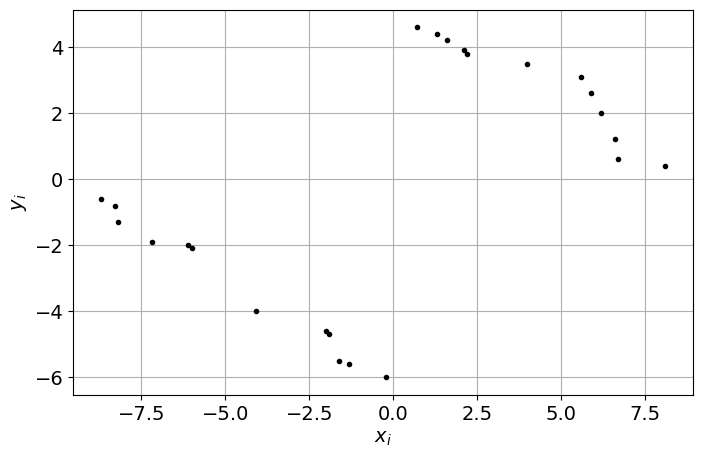

In [24]:
plt.plot(x_i,y_i,'k.');plt.xlabel(r'$x_i$');plt.ylabel(r'$y_i$');plt.grid();

**(b)** Compute $\tau$.

In [25]:
def is_concordant(pt1,pt2):
    return ((pt1[0]>pt2[0])&(pt1[1]>pt2[1])|(pt1[0]<pt2[0])&(pt1[1]<pt2[1]))

def is_discordant(pt1,pt2):
    return ((pt1[0]>pt2[0])&(pt1[1]<pt2[1])|(pt1[0]<pt2[0])&(pt1[1]>pt2[1]))

n=len(x_i)

In [26]:
Nc = np.sum([is_concordant((x_i[i],y_i[i]),(x_i[j],y_i[j])) for (i,j) in itertools.combinations(range(n),2)])
Nd = np.sum([is_discordant((x_i[i],y_i[i]),(x_i[j],y_i[j])) for (i,j) in itertools.combinations(range(n),2)]); Nd

print(Nc, Nd)

144 132


In [27]:
tau = (Nc-Nd)/(Nc+Nd); tau

0.043478260869565216

In [28]:
stats.kendalltau(x_i,y_i) # sanity check

SignificanceResult(statistic=0.043478260869565216, pvalue=0.7872722233024857)

**(c)** Compute $\rho$.

In [29]:
Rx_i = stats.rankdata(x_i); Ry_i = stats.rankdata(y_i)

Rbar = np.mean(Rx_i)

rho = np.sum((Rx_i-Rbar)*(Ry_i-Rbar) / np.sqrt(np.sum((Rx_i-Rbar)**2)*np.sum((Ry_i-Rbar)**2)))
p = 2*stats.t(df=n-2).sf(np.abs(rho)*np.sqrt((n-2)/(1-rho**2)))

print(rho, p)

0.5026086956521739 0.012311224300312232


In [30]:
stats.spearmanr(x_i,y_i) # sanity check

SignificanceResult(statistic=0.5026086956521739, pvalue=0.012311224300312232)

**(d)** Does either $\rho$ or $\tau$ lead to rejection of the null hypothesis
that $X$ and $Y$ are independent?

$\rho$ leads to a rejection of the null hypothesis while $\tau$ does not. 

#### Exercise 5.4.4:

Is there a significant correlation between the age at which a
U.S.president was inaugurated for the first time and the age at which he
\[sic\] died?

<table>
<tr><th>Name</th><th>Inaugurated</th><th>Died</th><th>Name</th><th>Inaugurated</th><th>Died</th></tr></td></tr>
<tr><td>Washington</td><td>     57</td><td>67</td><td>Hayes</td><td>       54</td><td>70</td></tr>
<tr><td>J. Adams</td><td>       61</td><td>90</td><td>Garfield</td><td>    49</td><td>49</td></tr>
<tr><td>Jefferson</td><td>      57</td><td>83</td><td>Arthur</td><td>      50</td><td>56</td></tr>
<tr><td>Madison</td><td>   57</td><td>85</td><td>Cleveland</td><td>   47</td><td>71</td></tr>
<tr><td>Monroe</td><td>         58</td><td>73</td><td>[B.] Harrison</td><td> 55</td><td>67</td></tr>
<tr><td>J. Q. Adams</td><td>    57</td><td>80</td><td>McKinley</td><td>    54</td><td>58</td></tr>
<tr><td>Jackson</td><td>        61</td><td>78</td><td>T. Roosevelt</td><td>42</td><td>60</td></tr>
<tr><td>Van Buren</td><td>      54</td><td>79</td><td>Taft</td><td>        51</td><td>72</td></tr>
<tr><td>[W. H.] Harrison</td><td>68</td><td>68</td><td>Wilson</td><td>      56</td><td>67</td></tr>
<tr><td>Tyler</td><td>          51</td><td>71</td><td>Harding</td><td>     55</td><td>57</td></tr>
<tr><td>Polk</td><td>           49</td><td>53</td><td>Coolidge</td><td>    51</td><td>60</td></tr>
<tr><td>Taylor</td><td>         64</td><td>65</td><td>Hoover</td><td>      54</td><td>90</td></tr>
<tr><td>Fillmore</td><td>  50</td><td>74</td><td>F. Roosevelt</td><td>51</td><td>63</td></tr>
<tr><td>Pierce</td><td>         48</td><td>64</td><td>Truman</td><td>      60</td><td>88</td></tr>
<tr><td>Buchanan</td><td>       65</td><td>77</td><td>Eisenhower</td><td>  62</td><td>78</td></tr>
<tr><td>Lincoln</td><td>        52</td><td>56</td><td>     Kennedy</td><td>     43</td><td>46</td></tr>
<tr><td>A. Johnson</td><td>     56</td><td>66</td><td>L. Johnson</td><td>  55</td><td>64</td></tr>
<tr><td>Grant</td><td>          46</td><td>63</td><td>Nixon</td><td>       56</td><td>81</td></tr>
</table>

\[Look up the ages for Gerald Ford, Jimmy Carter, Ronald Reagan, and George H. W. Bush, and append them to the data from the book.\]

In [31]:
x_i = np.array([57, 61, 57, 57, 58, 57, 61, 54, 68, 51, 49, 64, 50, 48, 65, 52, 56, 46, 
                54, 49, 50, 47, 55, 54, 42, 51, 56, 55, 51, 54, 51, 60, 62, 43, 55, 56])

y_i = np.array([67, 90, 83, 85, 73, 80, 78, 79, 68, 71, 53, 65, 74, 64, 77, 56, 66, 63, 
                70, 49, 56, 71, 67, 58, 60, 72, 67, 57, 60, 90, 63, 88, 78, 46, 64, 81])

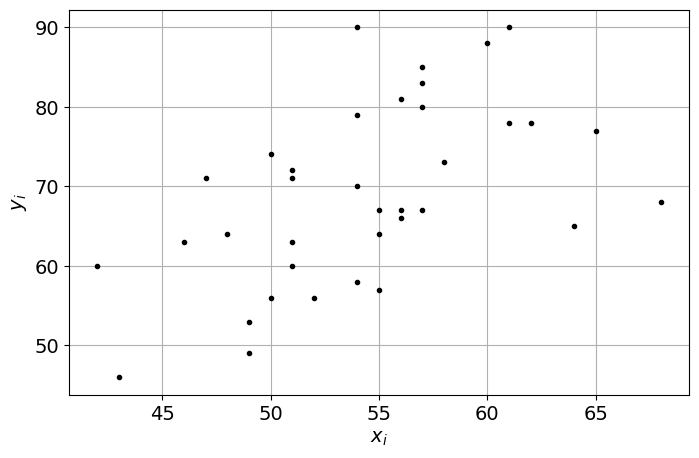

In [32]:
plt.plot(x_i,y_i,'k.');plt.xlabel(r'$x_i$');plt.ylabel(r'$y_i$');plt.grid();

**(a)** Use Spearman’s $\rho$.

$H_0$: There is no correlation between the variables.

$H_1$: There is a correlation between the variables.

$\rho = 0.5838$

$p$-value $=0.00018$

Since $0.00018<0.05$ we have suffiecient evidence to reject the null hypothesis.

In [33]:
n=len(x_i)

Rx_i = stats.rankdata(x_i); Ry_i = stats.rankdata(y_i)

Rbar = np.mean(Rx_i)

rho = np.sum((Rx_i-Rbar)*(Ry_i-Rbar) / np.sqrt(np.sum((Rx_i-Rbar)**2)*np.sum((Ry_i-Rbar)**2)))
p = 2*stats.t(df=n-2).sf(np.abs(rho)*np.sqrt((n-2)/(1-rho**2)))

print(rho, p)

0.5838724796155763 0.00018529531820576624


In [34]:
stats.spearmanr(x_i,y_i) # sanity check

SignificanceResult(statistic=0.5838724796155763, pvalue=0.00018529531820576624)

**(b)** Use Kendall’s $\tau$.

$H_0$: There is no correlation between the variables.

$H_1$: There is a correlation between the variables.

$\tau = 0.4195$

$p$-value $=0.00053$

Since $0.00053<0.05$ we have suffiecient evidence to reject the null hypothesis.

In [35]:
n=len(x_i)

Nc = []
Nd = []
t = 0

# deal with ties
for (i,j) in itertools.combinations(range(n),2):
    if x_i[i] != x_i[j] and y_i[i] == y_i[j]:
        t += 1/2 
    else:
        Nc.append(is_concordant((x_i[i],y_i[i]),(x_i[j],y_i[j])))
        Nd.append(is_discordant((x_i[i],y_i[i]),(x_i[j],y_i[j])))
        
Nc = np.sum(Nc) + t
Nd = np.sum(Nd) + t

print(Nc, Nd)

tau = (Nc-Nd)/(Nc+Nd); tau

428.0 175.0


0.41956882255389716

In [36]:
stats.kendalltau(x_i,y_i) # sanity check

SignificanceResult(statistic=0.4137766892398409, pvalue=0.0005380316021692781)

Note that these data do not represent a random sample, but one might
assume that they behave as a random sample of all U.S. presidents, past,
present and future.

#### Problem 5.4.5:

Find the exact distribution of $\rho$ and $\tau$ for the case where
$n=3$ under the usual assumption of independence.

\[You do not need to consider the $R$ statistic from Problem 5.4.4.\]

##### Spearman's $\rho$

In [37]:
import itertools

In [38]:
n = 3

In [39]:
R_r = np.arange(1,n+1)
sumsq_I = np.array([np.sum((R_r-permR_r)**2) for permR_r in itertools.permutations(R_r)], dtype=int)
rho_I = 1. - 6./(n*(n**2-1.)) * sumsq_I
2.*np.mean(rho_I >= rho)

0.3333333333333333

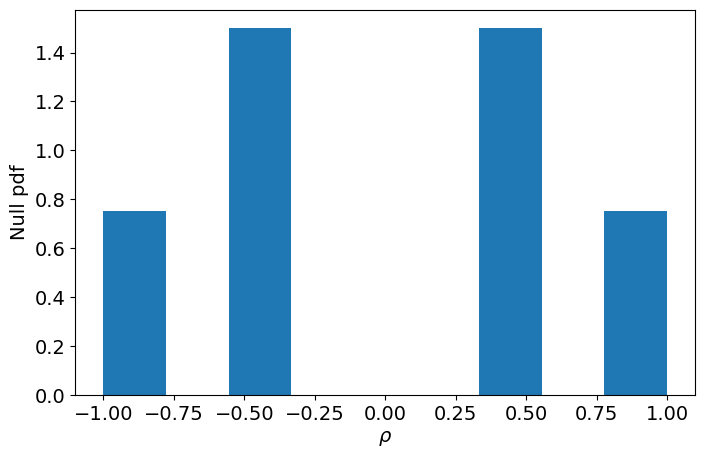

In [40]:
plt.hist(rho_I,bins=9,density=True); plt.xlabel(r'$\rho$'); plt.ylabel('Null pdf');

##### Kendall's $\tau$

In [41]:
idx_i = [i for i in range(n)]
Nc_I = np.array([np.sum([not((i>j)^(perm_i[i]>perm_i[j])) for (i,j) in itertools.combinations(idx_i,2)])
                 for perm_i in itertools.permutations(idx_i)])

Npairs = n*(n-1)//2

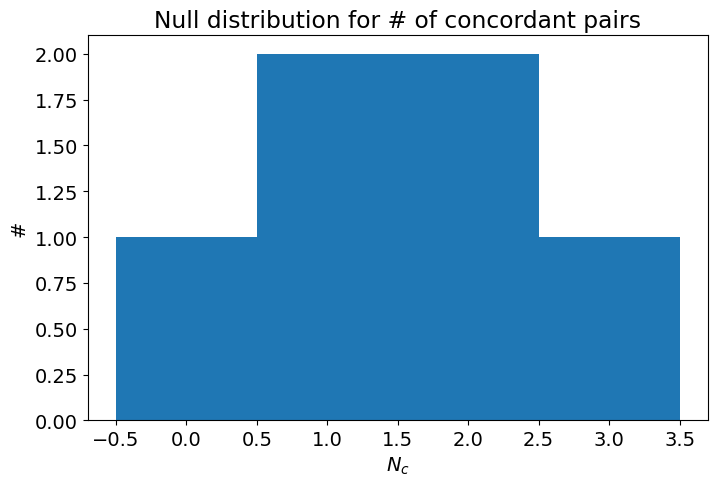

In [42]:
plt.hist(Nc_I,bins=np.arange(-0.5,Npairs+1));
plt.xlabel(r'$N_c$');plt.ylabel('#');plt.title('Null distribution for # of concordant pairs');

In [43]:
Npairs = n*(n-1)//2; Npairs

Nd_I = Npairs - Nc_I
tau_I = (Nc_I-Nd_I)/Npairs

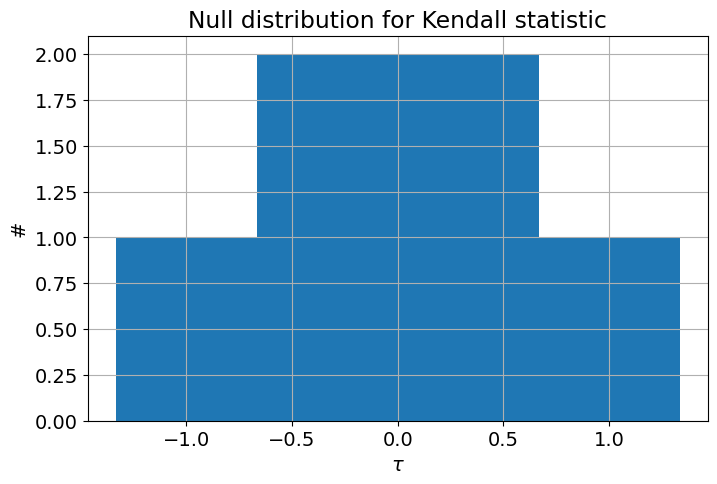

In [44]:
plt.hist(tau_I,bins=2*np.arange(-0.5,Npairs+1)/Npairs-1);
plt.xlabel(r'$\tau$');plt.ylabel('#');plt.title('Null distribution for Kendall statistic');plt.grid();